# Time series

We will learn 02 parts in this notebook: Handing and Visualizing time series .

## working with time series data

### datetime data type

You practice all parts in the book and do "your turn" in this notebook.

#1 datetime data type

#2 convert string <-> datetime 

### time series

#3 lagged plots

#4 resample

#5 rolling

ref: https://www.kaggle.com/code/ryanholbrook/time-series-as-features

https://pandas.pydata.org/docs/reference/api/pandas.plotting.lag_plot.html





In [3]:
# libraries
import pandas as pd
import numpy as np
from datetime import datetime


In [48]:
#1 datetime data type
#--- create a datetime object

now = datetime.now()
print(now) # print year, month, day, hour, minute, seceond, and milisecond
print(type(now))


date1 = datetime(2020, 1, 31)
type(date1)
date1 #date1 = (year, month, day)

print(date1.year)

#date2 = datetime(2020, 1, 31, 0, 30, 15, 10 )
#print(date2)

#date3 = datetime("2020/1/31")
#print(date3)


2023-04-11 08:47:17.815286
<class 'datetime.datetime'>
2020


In [49]:
#1 datetime data type
#--- the difference between 2 dates is a timedelta object
#--- visit this link for a timedelta object: https://docs.python.org/3/library/datetime.html#timedelta-objects

from datetime import timedelta

date1 = datetime(2020, 1, 31)

date2 = datetime(2021, 1, 31, 1, 2, 3, 4)

diff = date2 - date1
print(type(diff))
print(diff)
diff

date3 = date1 + timedelta(days = 10)
print(date3)

date4 = date1 + 10 * timedelta(hours = 24)
print (date4)

<class 'datetime.timedelta'>
366 days, 1:02:03.000004


datetime.timedelta(days=366, seconds=3723, microseconds=4)

In [56]:
#2 string -> datetime: use method strptime() of the datetime class

st1 = "2020-01-31"

date1 = datetime.strptime(st1, "%Y-%m-%d")
print(type(date1))
print(date1)


#datetime -> string: use the str() function or the strftime() of datetime objects

st1 = str(date1)
print(st1)

st2 = date1.strftime("%m/%d/%Y")
print(st2)


#st3 = date1.strftime("%m/%d/%Y") #strftime() does not need format matching
#print(st3)


<class 'datetime.datetime'>
2020-01-31 00:00:00
2020-01-31 00:00:00
01/31/2020


In [59]:
#2: strings - > datetime series

datestrs = ["2023-01-31 12:00:00", "02/28/2023 00:00:00"]

dates = pd.to_datetime(datestrs)  #to_datetime() will try to detect the format
print (dates)


DatetimeIndex(['2023-01-31 12:00:00', '2023-02-28 00:00:00'], dtype='datetime64[ns]', freq=None)


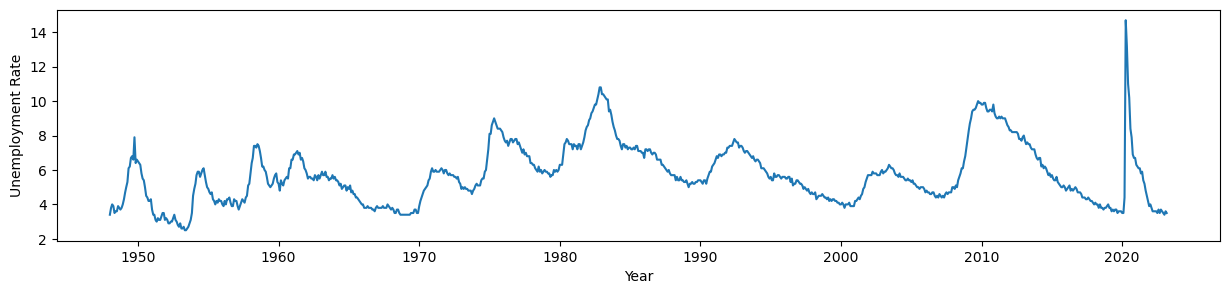

In [89]:
import matplotlib
import matplotlib.pyplot as plt

#2 your turn
#---visit this link to download the unemployment rate: 
#---https://fred.stlouisfed.org/series/UNRATE
#---then plot the rate against time series

df_unempl = pd.read_csv("./data/UNRATE.csv")
df_unempl['DATE'] = pd.to_datetime(df_unempl.DATE)


fig = plt.figure(figsize = (15,3))
ax = fig.add_subplot()

plt.plot(df_unempl.DATE, df_unempl.UNRATE)
plt.xlabel("Year")
plt.ylabel("Unemployment Rate")
plt.show()

In [ ]:
#2 your turn
#---visit this link to download the recession probabilities of the US.: 
#---https://fred.stlouisfed.org/series/RECPROUSM156N#
#---add the recession probabilities to the above plot.


DATE      datetime64[ns]
UNRATE           float64
dtype: object


Text(0, 0.5, 'unemplyment_rate(month + 1)')

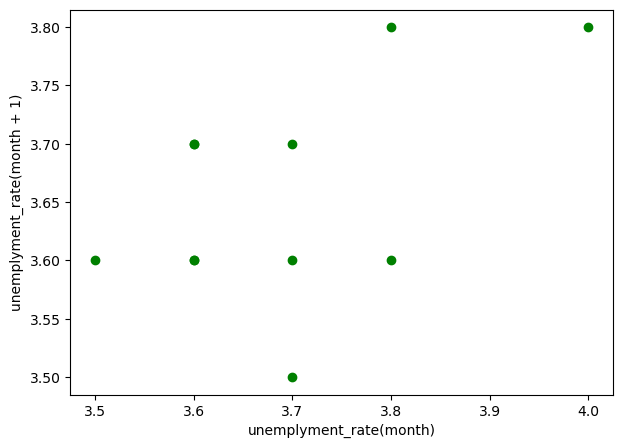

In [133]:
#3 lagged plot
#---when you want to see the dependency between time series, 
#---it is useful to use lag plot
#---in the following example, we want to see the dependency of unemployment rates
#---between 2 consecutive months in a year.

#---that will help for forecasting. For example, 
#---if you see that the unemployment rate of a month can proportional to 
#---that rate of the previous month, you can forecast the unemployment rate 
#---of a month, given the rate of the previous month.

YEAR = 2019
print(df_unempl.dtypes)
df_one_year = df_unempl[df_unempl.DATE.dt.year == YEAR]

df_one_year = df_one_year.set_index('DATE')

fig = plt.figure(figsize = (7,5))
ax = fig.add_subplot()
pd.plotting.lag_plot(df_one_year, lag=1, ax=ax, c = 'green')
ax.set_xlabel('unemplyment_rate(month)')
ax.set_ylabel('unemplyment_rate(month + 1)')


Text(0, 0.5, 'price(day + 1)')

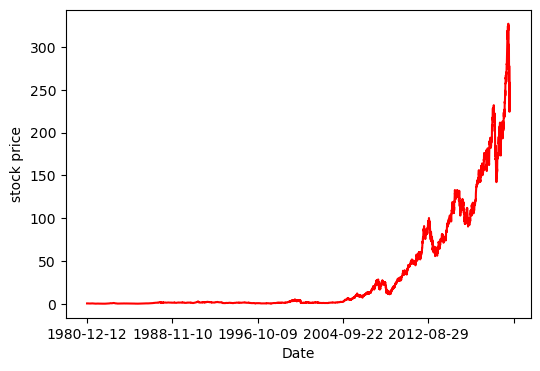

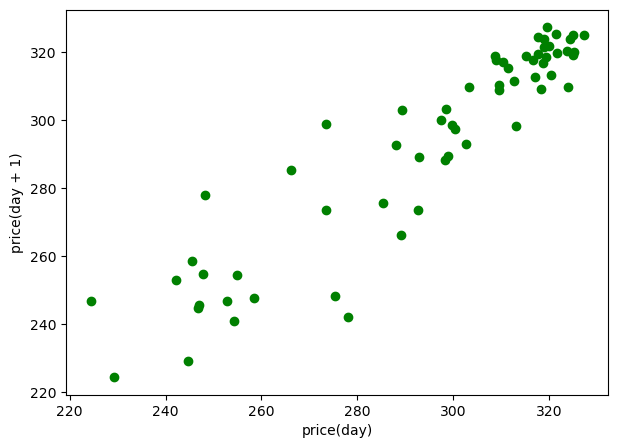

In [146]:
#3 lagged plot:
#---your turn:
#---download the stock market data set from this site: https://www.kaggle.com/datasets/jacksoncrow/stock-market-dataset

#---imagine that you want to invest your savings in business. You want to 
#---see if you can buy some companies' stocks
#---[1] make a right plot to see the trend of stock price of Apple.
#---[2] make a lagged plot to see if the stock price of Apple (or any other company)
#---has any patterns, e.g., is it often that stock price of a day depends on 
#---the price of the previous day?

df_aapl_stock = pd.read_csv('./data/AAPL.csv')
df_aapl_stock

#[1] we will use the line plot
fig = plt.figure(figsize = (6,4))
ax = fig.add_subplot()

df_aapl_stock = df_aapl_stock.set_index('Date', drop = False)
df_aapl_stock.Close.plot(color = 'red')

ax.set_ylabel('stock price')

#[2] YEAR = 2020

YEAR = 2020

df_aapl_stock['Date'] = pd.to_datetime(df_aapl_stock.Date)
df_one_year = df_aapl_stock[df_aapl_stock.Date.dt.year == YEAR]

df_one_year = df_one_year['Close']

fig = plt.figure(figsize = (7,5))
ax = fig.add_subplot()
pd.plotting.lag_plot(df_one_year, lag=1, ax=ax, c = 'green')
ax.set_xlabel('price(day)')
ax.set_ylabel('price(day + 1)')



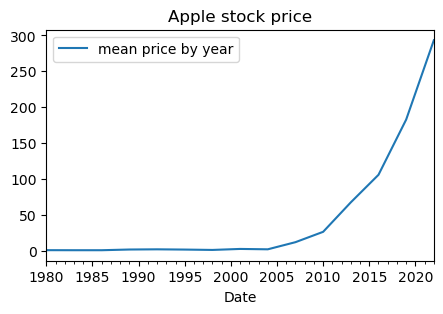

In [148]:
#4 resample


fig = plt.figure(figsize = (5,3))
ax = fig.add_subplot()

df_aapl_stock['Date'] = pd.to_datetime(df_aapl_stock.Date)
mean_by_year = df_aapl_stock.set_index('Date')['Close'].resample("3Y").mean()
mean_by_year.plot(ax = ax, label = 'mean price by year')
ax.set_title("Apple stock price")
ax.legend()



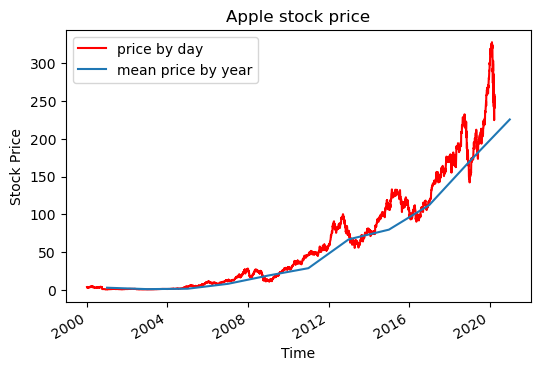

In [152]:
#4 resample
#---your turn:
#---Apple: plot [1] stock price by day and [2] mean price by months/years 
#---in the one figure.


fig = plt.figure(figsize = (6,4))
ax = fig.add_subplot()
df_aapl_stock = df_aapl_stock[df_aapl_stock['Date'] > "1-1-2000"]
df_aapl_stock = df_aapl_stock.set_index('Date', drop = False)
df_aapl_stock.Close.plot(color = 'red', label = 'price by day')

df_aapl_stock['Date'] = pd.to_datetime(df_aapl_stock.Date)
mean_by_year = df_aapl_stock.set_index('Date')['Close'].resample("2Y").mean()
mean_by_year.plot(ax = ax, label = 'mean price by year')

ax.set_title("Apple stock price")
ax.set_xlabel("Time")
ax.set_ylabel("Stock Price")
ax.legend()




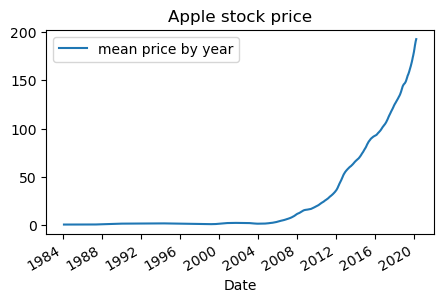

In [129]:
#5 rolling
fig = plt.figure(figsize = (5,3))
ax = fig.add_subplot()

df_aapl_stock.set_index('Date')['Close'].rolling(800).mean().plot(ax = ax, label = 'mean price by year')
ax.set_title("Apple stock price")
ax.legend()



In [ ]:
#5 rolling
#---your turn:
#---Apple: plot [1] stock price by day and [2] the rolling line in the above
#---code cell in the one figure.